In [1]:
__author__ = "@Tssp"
__date__   = "02/02/22"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [11]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [12]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [13]:
print(os.getcwd())
folder_path = "Simulations/ix7802_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q2d


In [14]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_152rm8g2l34m34_102CM8g1L34M34_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix7802_iy50_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_770-970_75b.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70250', '.70255', '.70260', '.70265', '.70270', '.70275', '.70280', '.70285', '.70290', '.70295', '.70300', '.70305', '.70310', '.70315', '.70316', '.70320', '.70325', '.70330', '.70335', '.70340', '.70345', '.70350', '.70355', '.70360', '.70365', '.70370', '.70375', '.70380', '.70385', '.70390', '.70395', '.70400', '.70405', '.70410', '.70415', '.70420', '.70425', '.70430', '.70435', '.70440', '.70445', '.70450', '.70455', '.70460', '.70465', '.70470', '.70475', '.70480', '.70485', '.70490', '.70495', '.70556', '.70557', '.70558', '.70559', '.70561', '.70562', '.70563', '.70564', '.70566', '.70567', '.70568', '.70569', '.70571', '.70572', '.70573', '.70574', '.70576', '.70577', '.70578', '.70579', '.70581', '.70582', '.70

In [15]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [16]:
dic = transpose_energies(Data)

In [17]:
least_bound_pos = 542

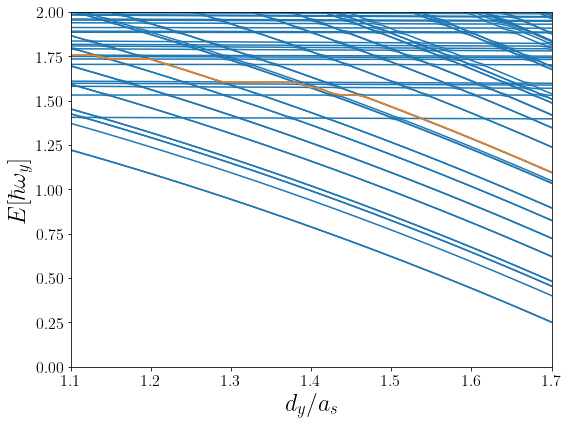

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 130):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
ax.plot(x, dic['nivel_560']/wy, 'C1')
ax.set_ylim(0, 2)
ax.set_xlim(1.1, 1.7)
#ax.vlines(x[158], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[128], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[103], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[83], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[63], 0, 10, alpha=0.5, linestyles='--', color='k')
#ax.vlines(x[46], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562


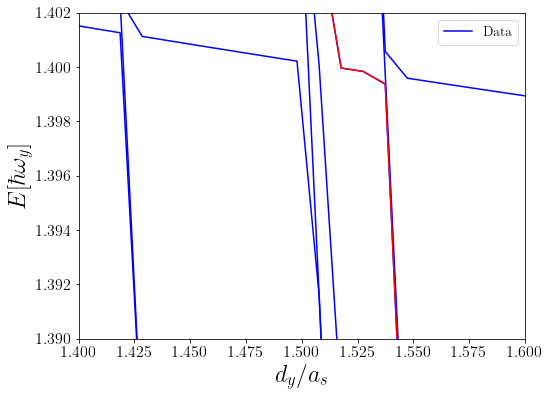

In [21]:
fig2, ax2 = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos+2, least_bound_pos + 21):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_560'.format(i)]/wy, 'r')
#ax2.vlines(x[145], 0, 10, alpha=0.5, linestyles='--')
#ax2.vlines(x[115], 0, 10, alpha=0.5, linestyles='--')
#ax2.vlines(x[90], 0, 10, alpha=0.5, linestyles='--')
#ax2.vlines(x[70], 0, 10, alpha=0.5, linestyles='--')
#ax2.vlines(x[50], 0, 10, alpha=0.5, linestyles='--')
#ax2.vlines(x[33], 0, 10, alpha=0.5, linestyles='--')
ax2.set_ylim(1.39, 1.402)
ax2.set_xlim(1.4, 1.6)
ax2.set_xlabel('$d_{y}/a_s$')
ax2.set_ylabel('$E[\hbar \omega_{y}]$')
ax2.legend(['Data'], fontsize=14)
plt.show()

# (2,0,0)

7.17514862570525e-15
[0.0, 1.53765916875609, 1.43959804489244 - 3.90671009969957*I, 1.43959804489244 + 3.90671009969957*I]
Write the position of the correct solution: 1
[0.0, 1.53765916875609, 1.43959804489244 - 3.90671009969957*I, 1.43959804489244 + 3.90671009969957*I]
Write the position of the correct solution: 1


(1.4, 1.6)

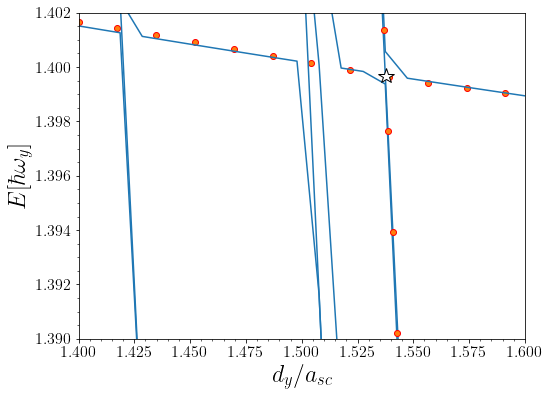

In [87]:
fig3, ax3 = plt.subplots(figsize=(8,6))
# nivel 553:
trap_poly = trap_fit(dic, x, x_lims=(1.2, 1.7), y_lims=(1.39, 1.41) ,levels=(553, 563), tol=1, wy=wy)/wy
x553 = np.linspace(1, 2.2, num=70)
ax3.scatter(x553, np.polyval(trap_poly, x553), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)
ax3.plot(x, dic['nivel_553']/wy, 'C0', label='Adiabatic', zorder=2)

# nivel 554:
ax3.plot(x, dic['nivel_554']/wy, 'C0', zorder=1)

# nivel 555:
ax3.plot(x, dic['nivel_555']/wy, 'C0', zorder=1)

# nivel 556:
ax3.plot(x, dic['nivel_556']/wy, 'C0', zorder=1)

# nivel 557:
ax3.plot(x, dic['nivel_557']/wy, 'C0', zorder=1)


# nivel 558:
ax3.plot(x, dic['nivel_558']/wy, 'C0', zorder=1)

# nivel 559:
ax3.plot(x, dic['nivel_559']/wy, 'C0', zorder=1)

# nivel 560:
ax3.plot(x, dic['nivel_560']/wy, 'C0', zorder=1)
f560 = np.polyfit(x[(x < 1.580) & (x > 1.562)], np.array(dic['nivel_560'])[(x < 1.580) & (x > 1.562)]/wy, deg=1)
x560 = np.linspace(1.5, 1.6, num=50)
ax3.scatter(x560, np.polyval(f560, x560), edgecolor='r', facecolor='C1', zorder=2)

# nivel 561:
ax3.plot(x, dic['nivel_561']/wy, 'C0', zorder=1)

# nivel 562:
ax3.plot(x, dic['nivel_562']/wy, 'C0', zorder=1)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f560), np.polyval(trap_poly, sp.re(cross_points(trap_poly, f560))), 'w*', markersize=16, markeredgecolor='k', label='ICIR')

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(1.39, 1.402)
ax3.set_xlim(1.4, 1.6)
#fig3.savefig('Results/Figures/LiLi_2d3d_4993_Easc_Interpolation.png', bbox_inches="tight", dpi=200)

In [88]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): ({cross_points(trap_poly, f560)}, {np.polyval(trap_poly, cross_points(trap_poly, f560))})
''')

[0.0, 1.53765916875609, 1.43959804489244 - 3.90671009969957*I, 1.43959804489244 + 3.90671009969957*I]
Write the position of the correct solution: 1
[0.0, 1.53765916875609, 1.43959804489244 - 3.90671009969957*I, 1.43959804489244 + 3.90671009969957*I]
Write the position of the correct solution: 1
Crosses between (x, E):
* trap-(2,0,0): (1.53765916875609, 1.39967106793348)



In [89]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): ({1/cross_points(trap_poly, f560)})
''')

[0.0, 1.53765916875609, 1.43959804489244 - 3.90671009969957*I, 1.43959804489244 + 3.90671009969957*I]
Write the position of the correct solution: 1
Crosses between (x, E):
* trap-(2,0,0): (0.650339178095601)

